## 一、实验作业目的
1)  掌握Numpy的使用；  
2)  掌握线性回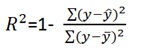归模型基本算法；
 

## 二、实验作业项目内容
### 1. 根据提供的广告渠道及销售数据编写程序绘制如下分析图：
1、根据提供的广告渠道数据及对应销售数据[exp3_data.csv]，采用多元线性回归模型进行训练；  
2、对模型进行测试，并用R^2参数评估模型；  
![avatar](实验作业03_R^2估计.jpg)
 y代表真实值，y^代表预测值，y-代表平均值；  
3、采用训练出的模型预测销售数据(电视渠道:100,地铁渠道:50,搜索渠道:60)；  
4、利用SKlearn库，最小二乘法及梯度下降法分别进行训练，评分，并比较异同。
![avatar](ls.png)





## 三、实验作业的算法（伪代码或者流程图）和源程序

In [28]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

In [29]:
data=pd.read_csv('exp3_data.csv')
x=data.values[:,0:3]
y=data.values[:,3]
print(y)
model1=LinearRegression()
model1.fit(x,y)
theta1=(model1.intercept_,model1.coef_)
def R2(y_true,y_pred):
    sum1=np.sum(np.power(y_true-y_pred,2))
    y_mean=np.ones(y_true.shape)*np.sum(y_true)/y_true.shape[0]
    sum2=np.sum(np.power(y_true-y_mean,2))
    r2=1-(sum1/sum2)
    return r2
y_pred=model1.predict(x)
r2=R2(y,y_pred)
sc=model1.score(x,y)
sc
predx=np.array([[100,50,60]])
predy=model1.predict(predx)
print(predy)

[22.1 10.4 12.  16.5 17.9  7.2 11.8 13.2  4.8]
[14.77472807]


## 最小二乘法
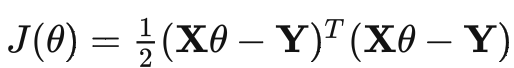
![avatar](ls.png)
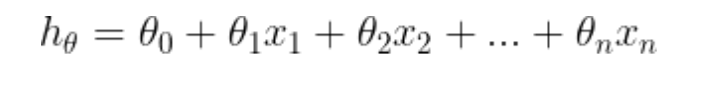

In [30]:
##最小二乘法
def ls_function(x,y):
    theta2=np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
    return theta2
x_ones=np.ones(x.shape[0])
x1=np.c_[x_ones,x]#拼接列
theta_ls=ls_function(x1,y)
print(theta_ls)
y_pred_ls=np.dot(x1,theta_ls)#预测值y^
r2_ls=R2(y,y_pred_ls)
r2_ls
predx=np.array([[1,100,50,60]])
pred_ls=np.dot(predx,theta_ls)
pred_ls

[4.78493646 0.06116305 0.05946047 0.01500772]


array([14.77472807])

## 梯度下降方法
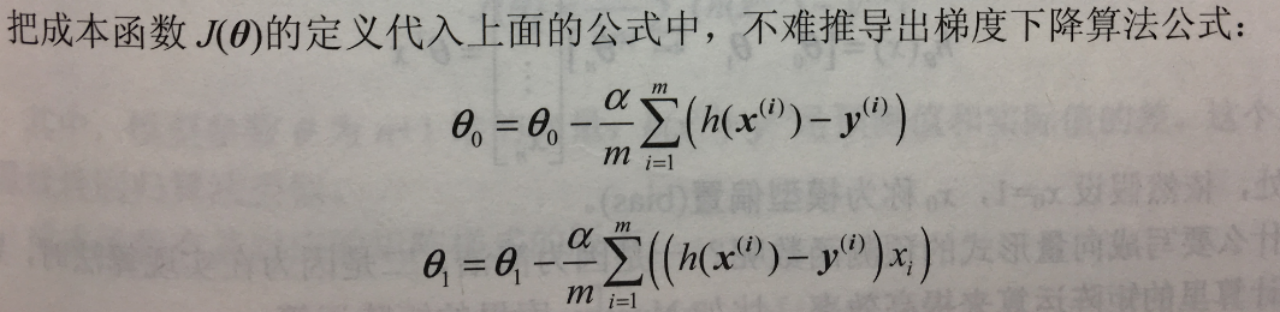
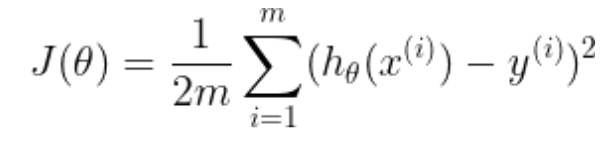

In [34]:
def db(alpha,x,y,theta,iteration):
    m=x.shape[0]#样本个数
    n=x.shape[1]#参数个数
    for t in range(iteration):
        for j in range(n):
            theta[j]=theta[j]-(alpha/m)*np.sum((np.dot(x,theta)-y)*x[:,j].reshape(-1,1))
    return theta

def featureNormlize(x):
    mu=np.average(x,axis=0)
    sigma=np.std(x,axis=0,ddof=1)
    x=(x-mu)/sigma
    return x

x2=featureNormlize(x)
x_ones=np.ones(x.shape[0])
x2=np.c_[x_ones,x2]

theta=np.zeros(x2.shape[1])
iteration=500#迭代次数
alpha=0.001#步长
theta3=db(alpha,x2,y,theta,iteration)
theta3
y_pred=np.dot(x1,theta3)#预测值y^
r2_db=R2(y,y_pred)
print(r2_db)
predx=np.array([[1,100,50,60]])
pred_db=np.dot(predx,theta3)
print(pred_db)

-0.0007720368286590062
[12.73760355]
